In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


On Train Data ===>
ACC : 0.9333333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       560
           1       0.00      0.00      0.00        40

    accuracy                           0.93       600
   macro avg       0.47      0.50      0.48       600
weighted avg       0.87      0.93      0.90       600

Confusion Matrix


<Axes: >

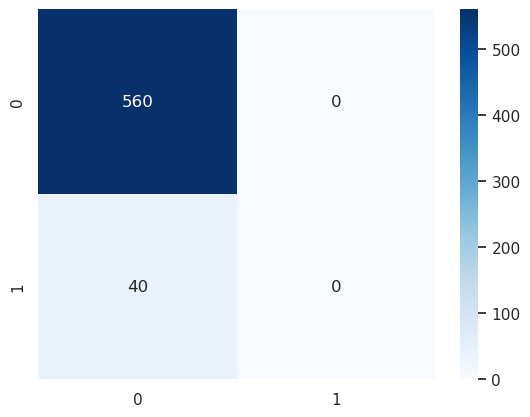


On Test Data ===>
ACC : 0.9418604651162791
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       243
           1       0.00      0.00      0.00        15

    accuracy                           0.94       258
   macro avg       0.47      0.50      0.49       258
weighted avg       0.89      0.94      0.91       258

Confusion Matrix


<Axes: >

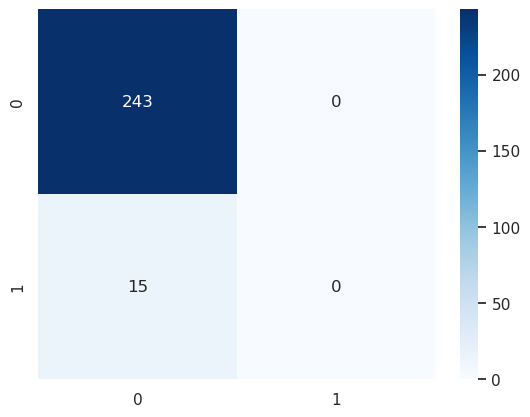

In [79]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_preprocessed = df.replace({'?':np.nan})
df_preprocessed = df_preprocessed.apply(pd.to_numeric)

for col in df.columns:
    df_preprocessed[col] = df_preprocessed[col].fillna(df_preprocessed[col].mean())

X = df_preprocessed.drop(['Biopsy'], axis=1)
y = df_preprocessed['Biopsy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

model = svm.SVC()
model.fit(X_train, y_train)

print("On Train Data ===>")

y_pred = model.predict(X_train)
print(f"ACC : {accuracy_score(y_train, y_pred)}")
print(f"Classification Report")
print(classification_report(y_train, y_pred))
print(f"Confusion Matrix")
display(sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='Blues', fmt='d'))
plt.show()

print()
print("On Test Data ===>")

y_pred = model.predict(X_test)
print(f"ACC : {accuracy_score(y_test, y_pred)}")
print(f"Classification Report")
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix")
display(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d'))

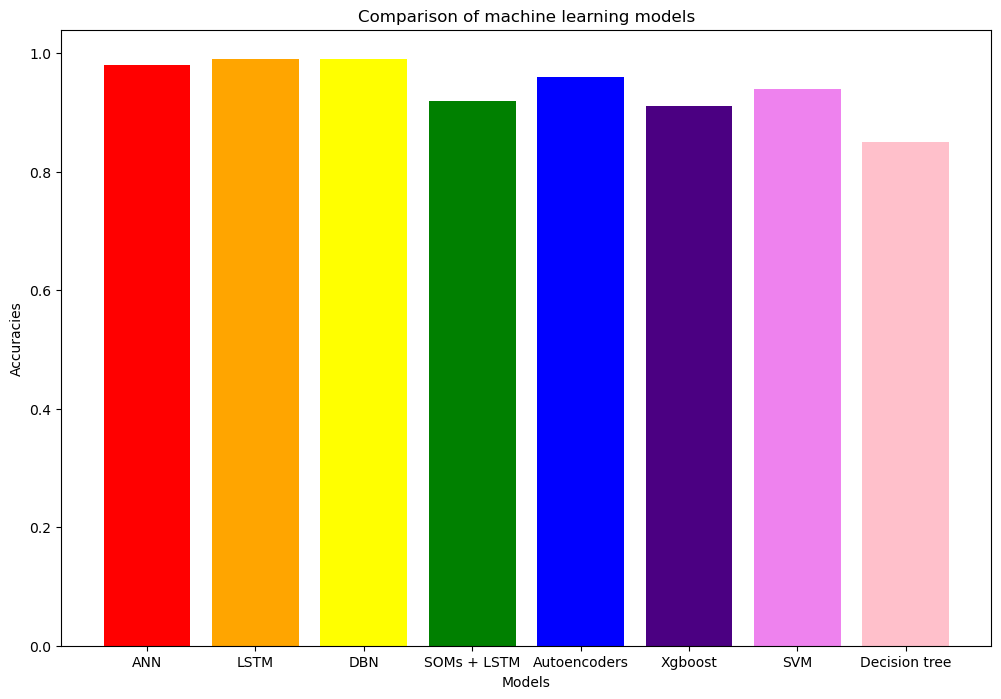

In [2]:
# Import matplotlib.pyplot library
import matplotlib.pyplot as plt

# Create a list of model names
models = ["ANN", "LSTM", "DBN", "SOMs + LSTM", "Autoencoders", "Xgboost", "SVM", "Decision tree"]

# Create a list of accuracies
accuracies = [0.98, 0.99, 0.99, 0.92, 0.96, 0.91, 0.94, 0.85]

# Create a figure with increased size
plt.figure(figsize=(12,8))

# Plot the data using a bar chart with different colors
plt.bar(models, accuracies, color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink'])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Comparison of machine learning models")

# Show the plot
plt.show()
